# Data Preprocessing

In [2]:
import re
import pandas as pd
from contractions import fix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
sns.set()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arbru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arbru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arbru\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## X dataset

In [57]:
x_df = pd.read_csv('../data/annotated/dehatebert/classified_x_df_CNERG.csv')
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2042 non-null   int64  
 1   Username            2042 non-null   object 
 2   Country_Code        8 non-null      object 
 3   Possibly_Sensitive  2042 non-null   bool   
 4   Date_Created        2042 non-null   object 
 5   No_of_Likes         2042 non-null   int64  
 6   Source              1985 non-null   object 
 7   Full_Text           2042 non-null   object 
 8   label               2042 non-null   object 
 9   confidence          2042 non-null   float64
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 145.7+ KB


In [58]:
x_df.describe()

,Unnamed: 0,No_of_Likes,confidence
count,2042.000000,2042.000000,2042.000000
mean,1020.500000,7.743879,0.864839
std,589.618945,78.573867,0.116052
min,0.000000,0.000000,0.500137
25%,510.250000,0.000000,0.806450
50%,1020.500000,0.000000,0.909009
75%,1530.750000,1.000000,0.957055
max,2041.000000,1530.000000,0.978073


In [59]:
x_df.isnull().sum()

Unnamed: 0               0
Username                 0
Country_Code          2034
Possibly_Sensitive       0
Date_Created             0
No_of_Likes              0
Source                  57
Full_Text                0
label                    0
confidence               0
dtype: int64

In [60]:
print(f"Duplicates: {x_df.duplicated().sum()}")

Duplicates: 0


In [62]:
x_df

,Unnamed: 0,Username,Country_Code,Possibly_Sensitive,Date_Created,No_of_Likes,Source,Full_Text,label,confidence
0,0,DevilHatman,NaN,False,2024-12-16 22:49:58+00:00,0,NaN,Once again @elonmusk and @X claim to be about ...,NON_HATE,0.938621
1,1,AmericanaMama_,NaN,False,2024-12-16 21:48:19+00:00,43,NaN,Leftists don't ban hate speech. \n\nThey ban s...,NON_HATE,0.670734
2,2,AnubisVRC,NaN,False,2024-12-16 21:32:25+00:00,0,NaN,To anyone on Vrchat o would say at this time o...,NON_HATE,0.949399
3,3,RaviManickavas1,NaN,False,2024-12-16 21:29:31+00:00,0,NaN,Saturday Morning's Earth Odyssey and NBC Comme...,NON_HATE,0.943067
4,4,usersnotreal,NaN,False,2024-12-16 21:23:28+00:00,0,NaN,Was gonna relapse but my bf gave a huge hate s...,NON_HATE,0.867823
...,...,...,...,...,...,...,...,...,...,...
2037,2037,JkittenYT,NaN,False,2025-03-18 22:27:36+00:00,0,X,Fuck you,NON_HATE,0.977394
2038,2038,phattFoxx_,NaN,False,2025-03-18 22:27:33+00:00,1,X,When I say fuck you all together just know I g...,NON_HATE,0.903720
2039,2039,satan_life,NaN,False,2025-03-18 22:27:31+00:00,0,X,"Fuck you, Elon. Bring back the Dropkick Murphy...",NON_HATE,0.799901
2040,2040,__marjestic,NaN,False,2025-03-18 22:27:26+00:00,0,X,Fuck you,NON_HATE,0.977394


In [64]:
def censor_words(text, banned_words):
    def censor_match(match):
        word = match.group(0)
        censored_word = re.sub(r'([aeiouAEIOU])', '*', word, count=1)
        return censored_word

    pattern = r"\b(" + "|".join(re.escape(word) for word in banned_words) + r")\b"
    return re.sub(pattern, censor_match, text, flags=re.IGNORECASE)


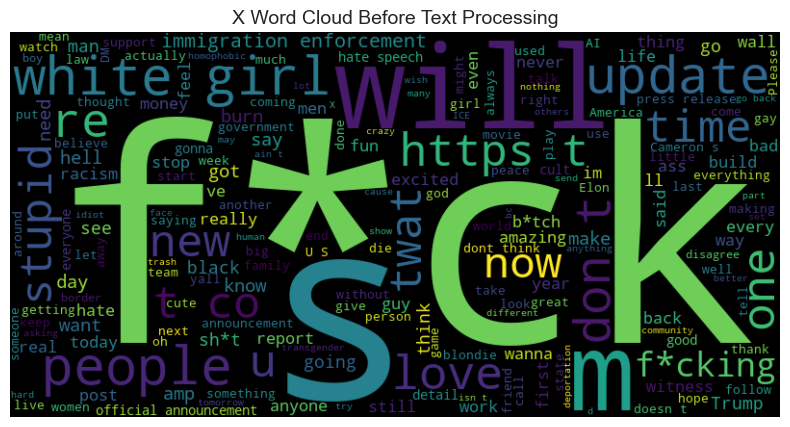

In [65]:
from wordcloud import WordCloud

text_data = " ".join(x_df["Full_Text"].astype(str))
banned_words = {"fuck", "fucking", "shit", "bitch", "faggot", "nigga"}

censored_text = censor_words(text_data, banned_words)

wordcloud = WordCloud(
    width=800, height=400,
    background_color="black",
    colormap="viridis",
    max_words=200,  
    regexp=r"\b[a-zA-Z*]+\b" 
).generate(censored_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("X Word Cloud Before Text Processing", fontsize=14)
plt.show()

In [66]:
def clean_text(text):
    """
    Function that removes @, special characters or hashtags.
    """
    text = text.lower()
    text = re.sub(r'@\w+', ' ', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return text.strip()

x_df["cleaned_text"] = x_df["Full_Text"].astype(str).apply(clean_text)
x_df.tail(30)

,Unnamed: 0,Username,Country_Code,Possibly_Sensitive,Date_Created,No_of_Likes,Source,Full_Text,label,confidence,cleaned_text
2012,2012,rencgades,NaN,False,2025-03-18 22:33:44+00:00,0,X,my immune system has actually decided to fuck ...,NON_HATE,0.968519,my immune system has actually decided to fuck ...
2013,2013,overtimenicco8,NaN,False,2025-03-18 22:33:41+00:00,14,X,"Wren was completely blindsided, he wouldn’t ha...",NON_HATE,0.962502,wren was completely blindsided he wouldnt have...
2014,2014,MYL2710,NaN,False,2025-03-18 22:33:37+00:00,0,X,Fuck @realDonaldTrump @netanyahu @elonmusk and...,HATE,0.634282,fuck and fuck the nation of israel and f...
2015,2015,moistcroutons,NaN,False,2025-03-18 22:33:24+00:00,0,X,sometimes thumbs up does mean fuck you,NON_HATE,0.961710,sometimes thumbs up does mean fuck you
2016,2016,imoutofmilk,NaN,False,2025-03-18 22:33:17+00:00,0,X,Everybody fuck off everybody fuck up off me,NON_HATE,0.833072,everybody fuck off everybody fuck up off me
2017,2017,casualchems,NaN,False,2025-03-18 22:32:41+00:00,0,X,I HATE HIM I HATE CHARLIE BUSHNELL FUCK YOU FO...,NON_HATE,0.810524,i hate him i hate charlie bushnell fuck you fo...
2018,2018,Holistone,NaN,False,2025-03-18 22:32:01+00:00,0,X,There's a high chance my mom's gonna be dead b...,NON_HATE,0.911317,theres a high chance my moms gonna be dead by ...
2019,2019,MeerRackz,NaN,False,2025-03-18 22:31:44+00:00,0,X,How the fuck you remove ts😭,NON_HATE,0.879375,how the fuck you remove ts
2020,2020,cxvvvowo,NaN,False,2025-03-18 22:31:33+00:00,2,X,fuck you lilly chou chou tiktok fans 🤣😂😂,NON_HATE,0.766965,fuck you lilly chou chou tiktok fans
2021,2021,delusional_diva,NaN,False,2025-03-18 22:31:07+00:00,4,X,fuck you.,NON_HATE,0.945977,fuck you


In [67]:
from wordsegment import load, segment

load()

def fix_hashtags(text):
    words = text.split()
    processed_words = []
    
    for word in words:
        if word.startswith("#"):
            clean_word = word[1:]  
            
            if re.search(r'[A-Z]', clean_word):
                clean_word = re.sub(r'([a-z])([A-Z])', r'\1 \2', clean_word)
            else:
                clean_word = " ".join(segment(clean_word))
            
            processed_words.append(clean_word)
        else:
            processed_words.append(word)

    return " ".join(processed_words)

x_df["cleaned_text"] = x_df["cleaned_text"].astype(str).apply(fix_hashtags)
x_df

,Unnamed: 0,Username,Country_Code,Possibly_Sensitive,Date_Created,No_of_Likes,Source,Full_Text,label,confidence,cleaned_text
0,0,DevilHatman,NaN,False,2024-12-16 22:49:58+00:00,0,NaN,Once again @elonmusk and @X claim to be about ...,NON_HATE,0.938621,once again and claim to be about free speech b...
1,1,AmericanaMama_,NaN,False,2024-12-16 21:48:19+00:00,43,NaN,Leftists don't ban hate speech. \n\nThey ban s...,NON_HATE,0.670734,leftists dont ban hate speech they ban speech ...
2,2,AnubisVRC,NaN,False,2024-12-16 21:32:25+00:00,0,NaN,To anyone on Vrchat o would say at this time o...,NON_HATE,0.949399,to anyone on vrchat o would say at this time o...
3,3,RaviManickavas1,NaN,False,2024-12-16 21:29:31+00:00,0,NaN,Saturday Morning's Earth Odyssey and NBC Comme...,NON_HATE,0.943067,saturday mornings earth odyssey and nbc commer...
4,4,usersnotreal,NaN,False,2024-12-16 21:23:28+00:00,0,NaN,Was gonna relapse but my bf gave a huge hate s...,NON_HATE,0.867823,was gonna relapse but my bf gave a huge hate s...
...,...,...,...,...,...,...,...,...,...,...,...
2037,2037,JkittenYT,NaN,False,2025-03-18 22:27:36+00:00,0,X,Fuck you,NON_HATE,0.977394,fuck you
2038,2038,phattFoxx_,NaN,False,2025-03-18 22:27:33+00:00,1,X,When I say fuck you all together just know I g...,NON_HATE,0.903720,when i say fuck you all together just know i g...
2039,2039,satan_life,NaN,False,2025-03-18 22:27:31+00:00,0,X,"Fuck you, Elon. Bring back the Dropkick Murphy...",NON_HATE,0.799901,fuck you elon bring back the dropkick murphys ...
2040,2040,__marjestic,NaN,False,2025-03-18 22:27:26+00:00,0,X,Fuck you,NON_HATE,0.977394,fuck you


In [71]:
x_df["cleaned_text"] = x_df["cleaned_text"].apply(fix)
x_df

,Unnamed: 0,Username,Country_Code,Possibly_Sensitive,Date_Created,No_of_Likes,Source,Full_Text,label,confidence,cleaned_text,tokens
0,0,DevilHatman,NaN,False,2024-12-16 22:49:58+00:00,0,NaN,Once again @elonmusk and @X claim to be about ...,NON_HATE,0.938621,once again and claim to be about free speech b...,"[claim, free, speech, reality, far, different,..."
1,1,AmericanaMama_,NaN,False,2024-12-16 21:48:19+00:00,43,NaN,Leftists don't ban hate speech. \n\nThey ban s...,NON_HATE,0.670734,leftists do not ban hate speech they ban speec...,"[leftists, not, ban, hate, speech, ban, speech..."
2,2,AnubisVRC,NaN,False,2024-12-16 21:32:25+00:00,0,NaN,To anyone on Vrchat o would say at this time o...,NON_HATE,0.949399,to anyone on vrchat o would say at this time o...,"[anyone, vrchat, would, say, time, year, put, ..."
3,3,RaviManickavas1,NaN,False,2024-12-16 21:29:31+00:00,0,NaN,Saturday Morning's Earth Odyssey and NBC Comme...,NON_HATE,0.943067,saturday mornings earth odyssey and nbc commer...,"[saturday, mornings, earth, odyssey, nbc, comm..."
4,4,usersnotreal,NaN,False,2024-12-16 21:23:28+00:00,0,NaN,Was gonna relapse but my bf gave a huge hate s...,NON_HATE,0.867823,was going to relapse but my bf gave a huge hat...,"[going, relapse, bf, gave, huge, hate, speech,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2037,2037,JkittenYT,NaN,False,2025-03-18 22:27:36+00:00,0,X,Fuck you,NON_HATE,0.977394,fuck you,[fuck]
2038,2038,phattFoxx_,NaN,False,2025-03-18 22:27:33+00:00,1,X,When I say fuck you all together just know I g...,NON_HATE,0.903720,when i say fuck you all together just know i g...,"[say, fuck, together, know, gave, chance]"
2039,2039,satan_life,NaN,False,2025-03-18 22:27:31+00:00,0,X,"Fuck you, Elon. Bring back the Dropkick Murphy...",NON_HATE,0.799901,fuck you elon bring back the dropkick murphys ...,"[fuck, elon, bring, back, dropkick, murphys, f..."
2040,2040,__marjestic,NaN,False,2025-03-18 22:27:26+00:00,0,X,Fuck you,NON_HATE,0.977394,fuck you,[fuck]


In [72]:
x_df["tokens"] = x_df["cleaned_text"].apply(word_tokenize)
print(x_df[["cleaned_text", "tokens"]].head())

                                        cleaned_text  \
0  once again and claim to be about free speech b...   
1  leftists do not ban hate speech they ban speec...   
2  to anyone on vrchat o would say at this time o...   
3  saturday mornings earth odyssey and nbc commer...   
4  was going to relapse but my bf gave a huge hat...   

                                              tokens  
0  [once, again, and, claim, to, be, about, free,...  
1  [leftists, do, not, ban, hate, speech, they, b...  
2  [to, anyone, on, vrchat, o, would, say, at, th...  
3  [saturday, mornings, earth, odyssey, and, nbc,...  
4  [was, going, to, relapse, but, my, bf, gave, a...  


In [73]:
stop_words = set(stopwords.words('english'))
stop_words.discard("not")
x_df["tokens"] = x_df["tokens"].apply(lambda words: [w for w in words if w not in stop_words])

In [74]:
lemmatizer = WordNetLemmatizer()

x_df["tokens"] = x_df["tokens"].apply(lambda words: [lemmatizer.lemmatize(w) for w in words])
x_df["processed_text"] = x_df["tokens"].apply(lambda words: ' '.join(words))

In [75]:
x_df.head()

,Unnamed: 0,Username,Country_Code,Possibly_Sensitive,Date_Created,No_of_Likes,Source,Full_Text,label,confidence,cleaned_text,tokens,processed_text
0,0,DevilHatman,NaN,False,2024-12-16 22:49:58+00:00,0,NaN,Once again @elonmusk and @X claim to be about ...,NON_HATE,0.938621,once again and claim to be about free speech b...,"[claim, free, speech, reality, far, different,...",claim free speech reality far different not cr...
1,1,AmericanaMama_,NaN,False,2024-12-16 21:48:19+00:00,43,NaN,Leftists don't ban hate speech. \n\nThey ban s...,NON_HATE,0.670734,leftists do not ban hate speech they ban speec...,"[leftist, not, ban, hate, speech, ban, speech,...",leftist not ban hate speech ban speech hate
2,2,AnubisVRC,NaN,False,2024-12-16 21:32:25+00:00,0,NaN,To anyone on Vrchat o would say at this time o...,NON_HATE,0.949399,to anyone on vrchat o would say at this time o...,"[anyone, vrchat, would, say, time, year, put, ...",anyone vrchat would say time year put radical ...
3,3,RaviManickavas1,NaN,False,2024-12-16 21:29:31+00:00,0,NaN,Saturday Morning's Earth Odyssey and NBC Comme...,NON_HATE,0.943067,saturday mornings earth odyssey and nbc commer...,"[saturday, morning, earth, odyssey, nbc, comme...",saturday morning earth odyssey nbc commercials...
4,4,usersnotreal,NaN,False,2024-12-16 21:23:28+00:00,0,NaN,Was gonna relapse but my bf gave a huge hate s...,NON_HATE,0.867823,was going to relapse but my bf gave a huge hat...,"[going, relapse, bf, gave, huge, hate, speech,...",going relapse bf gave huge hate speech dm woul...


In [76]:
x_df[["processed_text", "label"]].to_csv("../data/processed/processed_x_dataset.csv", index=False)

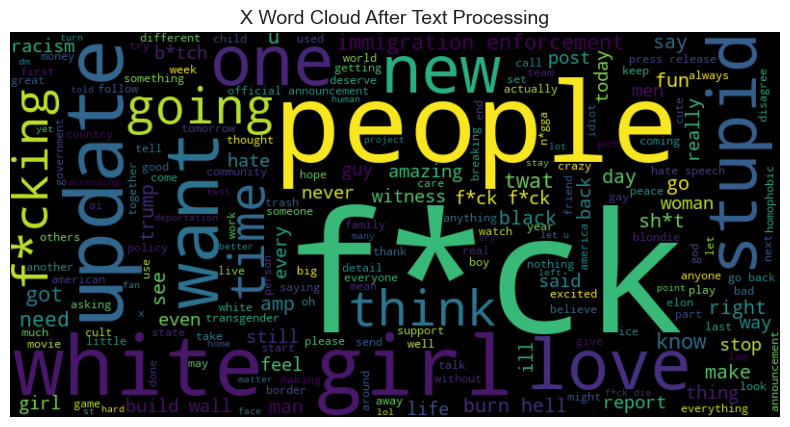

In [77]:
from wordcloud import WordCloud

text_data = " ".join(x_df["processed_text"].astype(str))
banned_words = {"fuck", "fucking", "shit", "bitch", "faggot", "nigga"}
censored_text = censor_words(text_data, banned_words)

wordcloud = WordCloud(
    width=800, height=400,
    background_color="black",
    colormap="viridis",
    max_words=200,
    regexp=r"\b[a-zA-Z*]+\b"   
).generate(censored_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("X Word Cloud After Text Processing", fontsize=14)
plt.show()


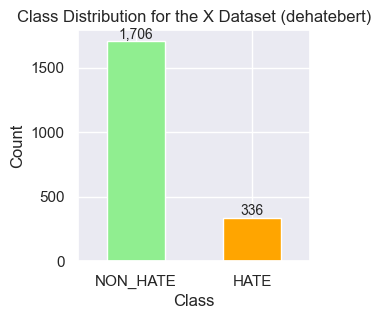

In [79]:
class_count = x_df['label'].value_counts()
plt.figure(figsize=(3,3))
bars = class_count.plot(kind='bar', color=['lightgreen','orange','red'])

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f"{bar.get_height():,}",
             ha="center", va="bottom", fontsize=10)
    
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution for the X Dataset (dehatebert)")
plt.xticks(rotation=0)
plt.show()

## Reddit dataset

In [94]:
reddit_df = pd.read_csv("../data/annotated/dehatebert/classified_reddit_df_CNERG.csv")
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46638 entries, 0 to 46637
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      46638 non-null  int64  
 1   title           46638 non-null  object 
 2   body            19125 non-null  object 
 3   author          46638 non-null  object 
 4   comment         46638 non-null  object 
 5   comment_author  38974 non-null  object 
 6   score           46638 non-null  int64  
 7   upvote_ratio    46638 non-null  float64
 8   created_utc     46638 non-null  object 
 9   subreddit       46638 non-null  object 
 10  label           46638 non-null  object 
 11  confidence      46638 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 4.3+ MB


In [95]:
reddit_df.describe()

,Unnamed: 0,score,upvote_ratio,confidence
count,46638.000000,46638.000000,46638.000000,46638.000000
mean,23318.500000,12617.964149,0.871977,0.911223
std,13463.375264,14429.522386,0.085995,0.094972
min,0.000000,0.000000,0.450000,0.500335
25%,11659.250000,1389.000000,0.820000,0.893501
50%,23318.500000,6913.000000,0.890000,0.952038
75%,34977.750000,15098.000000,0.940000,0.971738
max,46637.000000,50156.000000,1.000000,0.979011


In [96]:
reddit_df.isnull().sum()

Unnamed: 0            0
title                 0
body              27513
author                0
comment               0
comment_author     7664
score                 0
upvote_ratio          0
created_utc           0
subreddit             0
label                 0
confidence            0
dtype: int64

In [97]:
print(f"Duplicates: {reddit_df.duplicated().sum()}")

Duplicates: 0


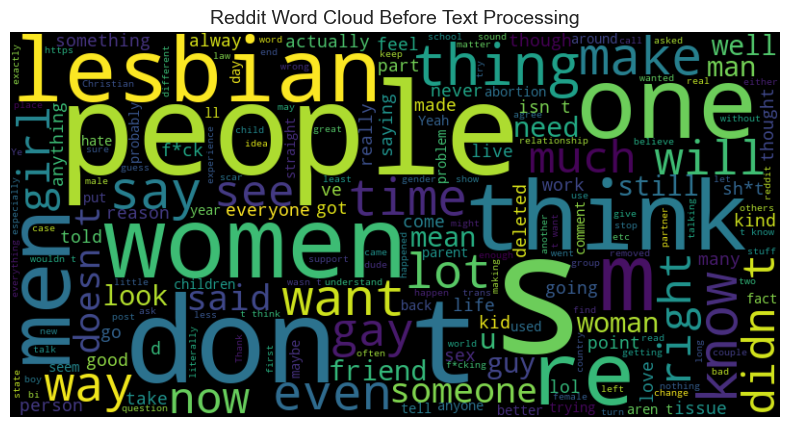

In [98]:
from wordcloud import WordCloud

text_data = " ".join(reddit_df["comment"].astype(str))
banned_words = {"fuck", "fucking", "shit", "bitch", "faggot", "nigga"}

censored_text = censor_words(text_data, banned_words)

wordcloud = WordCloud(
    width=800, height=400,
    background_color="black",
    colormap="viridis",
    max_words=200,  
    regexp=r"\b[a-zA-Z*]+\b" 
).generate(censored_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Reddit Word Cloud Before Text Processing", fontsize=14)
plt.show()

In [99]:
reddit_df["cleaned_text"] = reddit_df["comment"].astype(str).apply(clean_text)
reddit_df.tail(30)

,Unnamed: 0,title,body,author,comment,comment_author,score,upvote_ratio,created_utc,subreddit,label,confidence,cleaned_text
46608,46608,The sheriff fired her because she’s a lesbian ...,NaN,Majnum,>Did you remember she?\n\nVery grammar.,NaN,34075,0.85,2020-11-04 13:01:07+0000,TwoXChromosomes,NON_HATE,0.971466,did you remember she\n\nvery grammar
46609,46609,The sheriff fired her because she’s a lesbian ...,NaN,Majnum,That’s fucking awesome.,Superpiri,34075,0.85,2020-11-04 13:01:07+0000,TwoXChromosomes,NON_HATE,0.975599,thats fucking awesome
46610,46610,The sheriff fired her because she’s a lesbian ...,NaN,Majnum,Cool! Now do the job right and help change law...,QuiGonChuck,34075,0.85,2020-11-04 13:01:07+0000,TwoXChromosomes,NON_HATE,0.970719,cool now do the job right and help change law ...
46611,46611,The sheriff fired her because she’s a lesbian ...,NaN,Majnum,She’s the Sheriff!,Sweatytubesock,34075,0.85,2020-11-04 13:01:07+0000,TwoXChromosomes,NON_HATE,0.973251,shes the sheriff
46612,46612,The sheriff fired her because she’s a lesbian ...,NaN,Majnum,And that woman is Suzanne Sommers.,JamesJax,34075,0.85,2020-11-04 13:01:07+0000,TwoXChromosomes,NON_HATE,0.758310,and that woman is suzanne sommers
46613,46613,The sheriff fired her because she’s a lesbian ...,NaN,Majnum,I am happy to read these stories of victories :),BattyNess,34075,0.85,2020-11-04 13:01:07+0000,TwoXChromosomes,NON_HATE,0.975795,i am happy to read these stories of victories
46614,46614,The sheriff fired her because she’s a lesbian ...,NaN,Majnum,[https://imgflip.com/i/4kzs93](https://imgflip...,sausagekingofchicago,34075,0.85,2020-11-04 13:01:07+0000,TwoXChromosomes,NON_HATE,0.969615,
46615,46615,The sheriff fired her because she’s a lesbian ...,NaN,Majnum,Just to add some numbers because this felt a l...,SecondBee,34075,0.85,2020-11-04 13:01:07+0000,TwoXChromosomes,NON_HATE,0.970297,just to add some numbers because this felt a l...
46616,46616,The sheriff fired her because she’s a lesbian ...,NaN,Majnum,Yes!! Local elections are where voters have a ...,third-time-charmed,34075,0.85,2020-11-04 13:01:07+0000,TwoXChromosomes,NON_HATE,0.961646,yes local elections are where voters have a hu...
46617,46617,The sheriff fired her because she’s a lesbian ...,NaN,Majnum,But did you remember she?,durdurdurdurdurdur,34075,0.85,2020-11-04 13:01:07+0000,TwoXChromosomes,NON_HATE,0.977727,but did you remember she


In [100]:
reddit_df["cleaned_text"] = reddit_df["cleaned_text"].astype(str).apply(fix_hashtags)
reddit_df

,Unnamed: 0,title,body,author,comment,comment_author,score,upvote_ratio,created_utc,subreddit,label,confidence,cleaned_text
0,0,"Patriarchy, Marginalized Genders, Queer Femini...",Discussion + Vent + Stream of Consciousness po...,Oddly-Ordinary,Sounds like you should come on down and join u...,Merladylu,4,0.75,2024-10-30 17:25:36+0000,gender,NON_HATE,0.911610,sounds like you should come on down and join u...
1,1,Lesbian gender?,"For context I'm a member of a system, as a who...",Beyond_The_Stars815,it makes sense to me? it's kinda confusing but...,Toricon,6,1.00,2022-10-17 22:01:31+0000,gender,NON_HATE,0.947165,it makes sense to me its kinda confusing but g...
2,2,Lesbian gender?,"For context I'm a member of a system, as a who...",Beyond_The_Stars815,[removed],NaN,6,1.00,2022-10-17 22:01:31+0000,gender,NON_HATE,0.975493,removed
3,3,Lesbian gender?,"For context I'm a member of a system, as a who...",Beyond_The_Stars815,I'm still a bit confused as to what you're des...,shadowxthevamp,6,1.00,2022-10-17 22:01:31+0000,gender,NON_HATE,0.908459,im still a bit confused as to what youre descr...
4,4,Lesbian gender?,"For context I'm a member of a system, as a who...",Beyond_The_Stars815,"Lesbian is a sexual orientation, not a gender....",GiveMeUrBankingInfo,6,1.00,2022-10-17 22:01:31+0000,gender,NON_HATE,0.861022,lesbian is a sexual orientation not a gender a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46633,46633,The sheriff fired her because she’s a lesbian ...,NaN,Majnum,He is the only thing that makes Kentucky relev...,SpideyTingle,34075,0.85,2020-11-04 13:01:07+0000,TwoXChromosomes,NON_HATE,0.977293,he is the only thing that makes kentucky relevant
46634,46634,The sheriff fired her because she’s a lesbian ...,NaN,Majnum,What would that look like though? As much as I...,maybeelean,34075,0.85,2020-11-04 13:01:07+0000,TwoXChromosomes,NON_HATE,0.954576,what would that look like though as much as i ...
46635,46635,The sheriff fired her because she’s a lesbian ...,NaN,Majnum,If the only thing Mitch McConnell could bring ...,ablake0406,34075,0.85,2020-11-04 13:01:07+0000,TwoXChromosomes,NON_HATE,0.930404,if the only thing mitch mcconnell could bring ...
46636,46636,The sheriff fired her because she’s a lesbian ...,NaN,Majnum,You already have states. Just make them indepe...,MegaBaumTV,34075,0.85,2020-11-04 13:01:07+0000,TwoXChromosomes,NON_HATE,0.917807,you already have states just make them indepen...


In [101]:
reddit_df["cleaned_text"] = reddit_df["cleaned_text"].apply(fix)
reddit_df

,Unnamed: 0,title,body,author,comment,comment_author,score,upvote_ratio,created_utc,subreddit,label,confidence,cleaned_text
0,0,"Patriarchy, Marginalized Genders, Queer Femini...",Discussion + Vent + Stream of Consciousness po...,Oddly-Ordinary,Sounds like you should come on down and join u...,Merladylu,4,0.75,2024-10-30 17:25:36+0000,gender,NON_HATE,0.911610,sounds like you should come on down and join u...
1,1,Lesbian gender?,"For context I'm a member of a system, as a who...",Beyond_The_Stars815,it makes sense to me? it's kinda confusing but...,Toricon,6,1.00,2022-10-17 22:01:31+0000,gender,NON_HATE,0.947165,it makes sense to me its kind of confusing but...
2,2,Lesbian gender?,"For context I'm a member of a system, as a who...",Beyond_The_Stars815,[removed],NaN,6,1.00,2022-10-17 22:01:31+0000,gender,NON_HATE,0.975493,removed
3,3,Lesbian gender?,"For context I'm a member of a system, as a who...",Beyond_The_Stars815,I'm still a bit confused as to what you're des...,shadowxthevamp,6,1.00,2022-10-17 22:01:31+0000,gender,NON_HATE,0.908459,i am still a bit confused as to what you are d...
4,4,Lesbian gender?,"For context I'm a member of a system, as a who...",Beyond_The_Stars815,"Lesbian is a sexual orientation, not a gender....",GiveMeUrBankingInfo,6,1.00,2022-10-17 22:01:31+0000,gender,NON_HATE,0.861022,lesbian is a sexual orientation not a gender a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46633,46633,The sheriff fired her because she’s a lesbian ...,NaN,Majnum,He is the only thing that makes Kentucky relev...,SpideyTingle,34075,0.85,2020-11-04 13:01:07+0000,TwoXChromosomes,NON_HATE,0.977293,he is the only thing that makes kentucky relevant
46634,46634,The sheriff fired her because she’s a lesbian ...,NaN,Majnum,What would that look like though? As much as I...,maybeelean,34075,0.85,2020-11-04 13:01:07+0000,TwoXChromosomes,NON_HATE,0.954576,what would that look like though as much as i ...
46635,46635,The sheriff fired her because she’s a lesbian ...,NaN,Majnum,If the only thing Mitch McConnell could bring ...,ablake0406,34075,0.85,2020-11-04 13:01:07+0000,TwoXChromosomes,NON_HATE,0.930404,if the only thing mitch mcconnell could bring ...
46636,46636,The sheriff fired her because she’s a lesbian ...,NaN,Majnum,You already have states. Just make them indepe...,MegaBaumTV,34075,0.85,2020-11-04 13:01:07+0000,TwoXChromosomes,NON_HATE,0.917807,you already have states just make them indepen...


In [102]:
reddit_df["tokens"] = reddit_df["cleaned_text"].apply(word_tokenize)
print(reddit_df[["cleaned_text", "tokens"]].head())

                                        cleaned_text  \
0  sounds like you should come on down and join u...   
1  it makes sense to me its kind of confusing but...   
2                                            removed   
3  i am still a bit confused as to what you are d...   
4  lesbian is a sexual orientation not a gender a...   

                                              tokens  
0  [sounds, like, you, should, come, on, down, an...  
1  [it, makes, sense, to, me, its, kind, of, conf...  
2                                          [removed]  
3  [i, am, still, a, bit, confused, as, to, what,...  
4  [lesbian, is, a, sexual, orientation, not, a, ...  


In [103]:
stop_words = set(stopwords.words('english'))
stop_words.discard("not")
reddit_df["tokens"] = reddit_df["tokens"].apply(lambda words: [w for w in words if w not in stop_words])
reddit_df["tokens"]

0        [sounds, like, come, join, us, pansexual, part...
1        [makes, sense, kind, confusing, gender, whole,...
2                                                [removed]
3        [still, bit, confused, describing, lesbian, ge...
4        [lesbian, sexual, orientation, not, gender, le...
                               ...                        
46633                   [thing, makes, kentucky, relevant]
46634    [would, look, like, though, much, agree, two, ...
46635    [thing, mitch, mcconnell, could, bring, misery...
46636                 [already, states, make, independent]
46637                                            [removed]
Name: tokens, Length: 46638, dtype: object

In [104]:
lemmatizer = WordNetLemmatizer()

reddit_df["tokens"] = reddit_df["tokens"].apply(lambda words: [lemmatizer.lemmatize(w) for w in words])
reddit_df["processed_text"] = reddit_df["tokens"].apply(lambda words: ' '.join(words))
reddit_df["processed_text"].tail(30)

46608                                     remember grammar
46609                                      fucking awesome
46610    cool job right help change law enforcement better
46611                                              sheriff
46612                                woman suzanne sommers
46613                             happy read story victory
46614                                                     
46615    add number felt little bit unclear primary for...
46616    yes local election voter huge impact really sh...
46617                                             remember
46618    sadly not enough karmic power moscow mitch con...
46619                                                smort
46620              name reminds need buy hail sagan tshirt
46621              another law enforcement lesbian working
46622                          literal justice boner right
46623            thanks unclear needing happy news morning
46624                                                 na

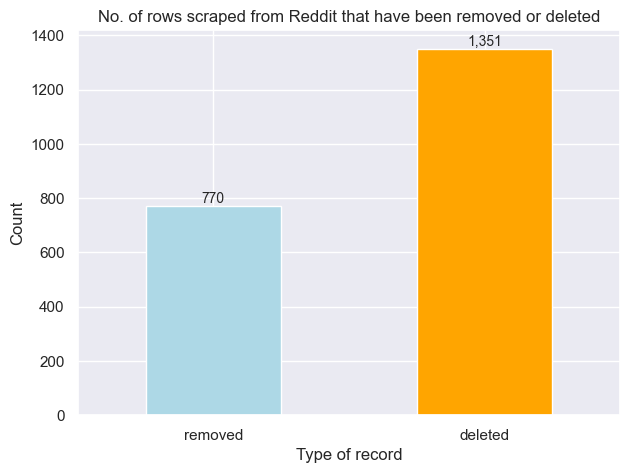

In [105]:
to_be_removed = ["removed","deleted"]

bad_values = reddit_df["processed_text"].value_counts().loc[to_be_removed]
plt.figure(figsize=(7,5))
bars = bad_values.plot(kind='bar', color=['lightblue','orange'])
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f"{bar.get_height():,}",
             ha="center", va="bottom", fontsize=10)
plt.xlabel('Type of record')
plt.ylabel('Count')
plt.title('No. of rows scraped from Reddit that have been removed or deleted')
plt.xticks(rotation=0)
plt.show()



In [106]:
reddit_df = reddit_df[~reddit_df["processed_text"].isin(to_be_removed)]
reddit_df

,Unnamed: 0,title,body,author,comment,comment_author,score,upvote_ratio,created_utc,subreddit,label,confidence,cleaned_text,tokens,processed_text
0,0,"Patriarchy, Marginalized Genders, Queer Femini...",Discussion + Vent + Stream of Consciousness po...,Oddly-Ordinary,Sounds like you should come on down and join u...,Merladylu,4,0.75,2024-10-30 17:25:36+0000,gender,NON_HATE,0.911610,sounds like you should come on down and join u...,"[sound, like, come, join, u, pansexual, party,...",sound like come join u pansexual party want
1,1,Lesbian gender?,"For context I'm a member of a system, as a who...",Beyond_The_Stars815,it makes sense to me? it's kinda confusing but...,Toricon,6,1.00,2022-10-17 22:01:31+0000,gender,NON_HATE,0.947165,it makes sense to me its kind of confusing but...,"[make, sense, kind, confusing, gender, whole, ...",make sense kind confusing gender whole confusi...
3,3,Lesbian gender?,"For context I'm a member of a system, as a who...",Beyond_The_Stars815,I'm still a bit confused as to what you're des...,shadowxthevamp,6,1.00,2022-10-17 22:01:31+0000,gender,NON_HATE,0.908459,i am still a bit confused as to what you are d...,"[still, bit, confused, describing, lesbian, ge...",still bit confused describing lesbian gender s...
4,4,Lesbian gender?,"For context I'm a member of a system, as a who...",Beyond_The_Stars815,"Lesbian is a sexual orientation, not a gender....",GiveMeUrBankingInfo,6,1.00,2022-10-17 22:01:31+0000,gender,NON_HATE,0.861022,lesbian is a sexual orientation not a gender a...,"[lesbian, sexual, orientation, not, gender, le...",lesbian sexual orientation not gender lesbian ...
5,5,Lesbian gender?,"For context I'm a member of a system, as a who...",Beyond_The_Stars815,Is sexual orientation and gender the same thing?,Sweaty-Tower-7709,6,1.00,2022-10-17 22:01:31+0000,gender,NON_HATE,0.975464,is sexual orientation and gender the same thing,"[sexual, orientation, gender, thing]",sexual orientation gender thing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46632,46632,The sheriff fired her because she’s a lesbian ...,NaN,Majnum,european here. why just not separate the US in...,MegaBaumTV,34075,0.85,2020-11-04 13:01:07+0000,TwoXChromosomes,NON_HATE,0.947480,european here why just not separate the us in ...,"[european, not, separate, u, many, smaller, in...",european not separate u many smaller independe...
46633,46633,The sheriff fired her because she’s a lesbian ...,NaN,Majnum,He is the only thing that makes Kentucky relev...,SpideyTingle,34075,0.85,2020-11-04 13:01:07+0000,TwoXChromosomes,NON_HATE,0.977293,he is the only thing that makes kentucky relevant,"[thing, make, kentucky, relevant]",thing make kentucky relevant
46634,46634,The sheriff fired her because she’s a lesbian ...,NaN,Majnum,What would that look like though? As much as I...,maybeelean,34075,0.85,2020-11-04 13:01:07+0000,TwoXChromosomes,NON_HATE,0.954576,what would that look like though as much as i ...,"[would, look, like, though, much, agree, two, ...",would look like though much agree two differen...
46635,46635,The sheriff fired her because she’s a lesbian ...,NaN,Majnum,If the only thing Mitch McConnell could bring ...,ablake0406,34075,0.85,2020-11-04 13:01:07+0000,TwoXChromosomes,NON_HATE,0.930404,if the only thing mitch mcconnell could bring ...,"[thing, mitch, mcconnell, could, bring, misery...",thing mitch mcconnell could bring misery kentu...


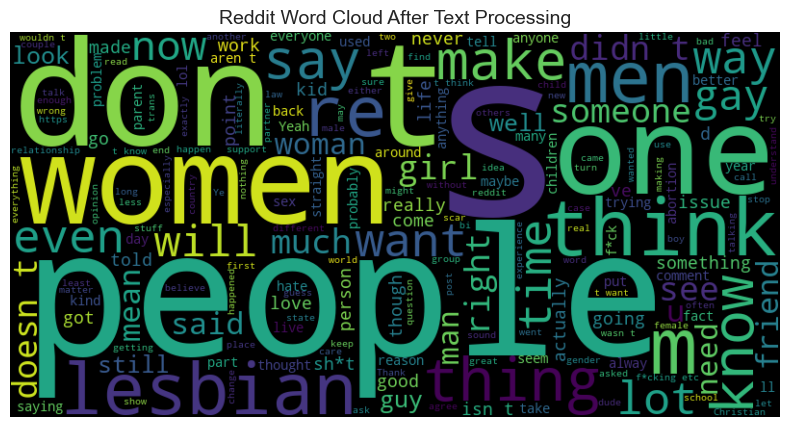

In [107]:
from wordcloud import WordCloud

text_data = " ".join(reddit_df["comment"].astype(str))
banned_words = {"fuck", "fucking", "shit", "bitch", "faggot", "nigga"}

censored_text = censor_words(text_data, banned_words)

wordcloud = WordCloud(
    width=800, height=400,
    background_color="black",
    colormap="viridis",
    max_words=200,  
    regexp=r"\b[a-zA-Z*]+\b" 
).generate(censored_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Reddit Word Cloud After Text Processing", fontsize=14)
plt.show()

In [108]:
reddit_class = reddit_df['label'].value_counts()

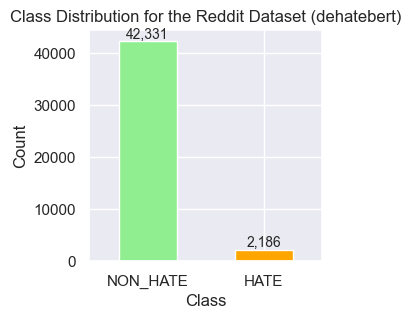

In [110]:
plt.figure(figsize=(3,3))
reddit_bar = reddit_class.plot(kind='bar', color=['lightgreen','orange','red'])
for bar in reddit_bar.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f"{bar.get_height():,}",
             ha="center", va="bottom", fontsize=10)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title("Class Distribution for the Reddit Dataset (dehatebert)")
plt.xticks(rotation=0)
plt.show()

In [111]:
reddit_df[['processed_text', 'label']].to_csv('../data/processed/processed_reddit_dataset.csv')